# Install

<font size="4">Since the package **RDKit** can only install on conda<br>
The code below shows how to install conda and RDKit</font>

In [1]:
# install Conda
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda install -c rdkit rdkit -y
from rdkit import Chem

--2021-02-19 03:46:41--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  83.6MB/s    in 1.0s    

2021-02-19 03:46:42 (83.6 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [2]:
!pip install deepchem

     |████████████████████████████████| 531 kB 4.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 303 kB 65.0 MB/s 
     |████████████████████████████████| 27.4 MB 75 kB/s 


#CH3 DeepChem syntax

In [3]:
import deepchem as dc
import numpy as np

x = np.random.random((4, 5))
y = np.random.random((4, 1))
dataset = dc.data.NumpyDataset(x, y)
print("x=",dataset.X)
print("y=",dataset.y)
is_equal = np.array_equal(x, dataset.X)
print("x & dataset.X is equal = ",is_equal)

x= [[0.82120942 0.08360586 0.69541506 0.54666047 0.45934828]
 [0.61025204 0.54187581 0.66684778 0.03363916 0.84644377]
 [0.02436431 0.01490773 0.89104922 0.47386722 0.83855499]
 [0.89301531 0.90274273 0.7158285  0.3687356  0.78248167]]
y= [[0.51848866]
 [0.39665344]
 [0.11211965]
 [0.0439678 ]]
x & dataset.X is equal =  True


In [4]:
import deepchem as dc
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21()
print(tox21_tasks)
print(len(tox21_tasks))

['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']
12


In [5]:
train_dataset, valid_dataset, test_dataset = tox21_datasets
print(train_dataset.X.shape)
print(valid_dataset.X.shape)
print(test_dataset.X.shape)
print()
print(train_dataset.y.shape)
print(train_dataset)

(6264, 1024)
(783, 1024)
(784, 1024)

(6264, 12)
<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>


# Ch4 Predict Solubility

In [6]:
# ch4

# ignore warning
import warnings
warnings.filterwarnings("ignore")

# Train a neural network to predict the solubility of molecules.  First load the data.
import deepchem as dc
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

# Create and train the model.
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

# Evaluate it.
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score")
print(model.evaluate(train_dataset, [metric], transformers))
print("Test set score")
print(model.evaluate(test_dataset, [metric], transformers))

# Use it to predict the solubility of some molecules.
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
          'CCOC(=O)CC',
          'CSc1nc(NC(C)C)nc(NC(C)C)n1',
          'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
          'Cc1cc2ccccc2cc1C',
          'CCO'
          ]
from rdkit import Chem
mols = [Chem.MolFromSmiles(s) for s in smiles]
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)
predicted_solubility = model.predict_on_batch(x)
for m,s in zip(smiles, predicted_solubility):
    print()
    print('Molecule:', m)
    print('Predicted solubility:', s)

Training set score
{'pearson_r2_score': 0.9260751378500746}
Test set score
{'pearson_r2_score': 0.6260278430752173}

Molecule: COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C
Predicted solubility: [-0.6772352]

Molecule: CCOC(=O)CC
Predicted solubility: [1.3849658]

Molecule: CSc1nc(NC(C)C)nc(NC(C)C)n1
Predicted solubility: [-0.11052155]

Molecule: CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1
Predicted solubility: [-0.30156434]

Molecule: Cc1cc2ccccc2cc1C
Predicted solubility: [-1.1371709]

Molecule: CCO
Predicted solubility: [2.261117]


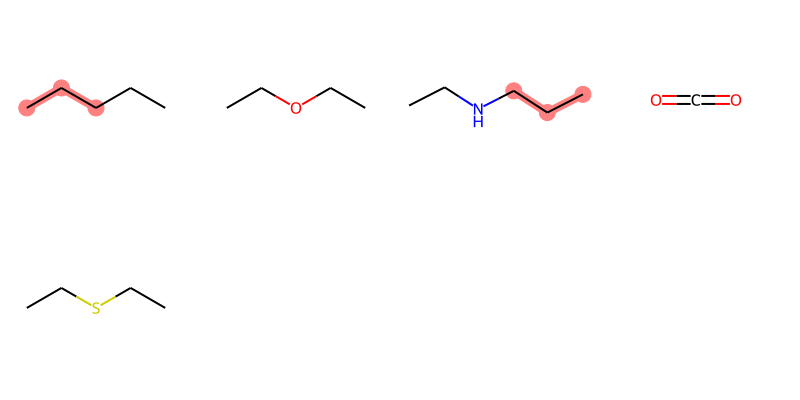

In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
smiles_list = ["CCCCC","CCOCC","CCNCCC","C(=O)=O","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
query = Chem.MolFromSmarts("CCC")
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols = mol_list,molsPerRow = 4,highlightAtomLists=match_list)